## Data loading

In [1]:
import pandas as pd

try:
    df = pd.read_csv('house_prices_data.csv')
    display(df.head())
    display(df.info())
except FileNotFoundError:
    print("Error: 'house_prices.csv' not found. Please ensure the file is in the correct location.")
    df = None


,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,Date
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,2022-07-08
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,2021-10-10
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,2023-12-17
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,2024-05-04
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,2024-02-02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
 9   Date           99499 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB


None

## Data exploration


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
 9   Date           99499 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB
None

Unique values for property_type:
property_type
House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Penthouse          255
Room               241
Farm House          88
Name: count, dtype: int64
Number of unique values for property_type: 7

Unique values f

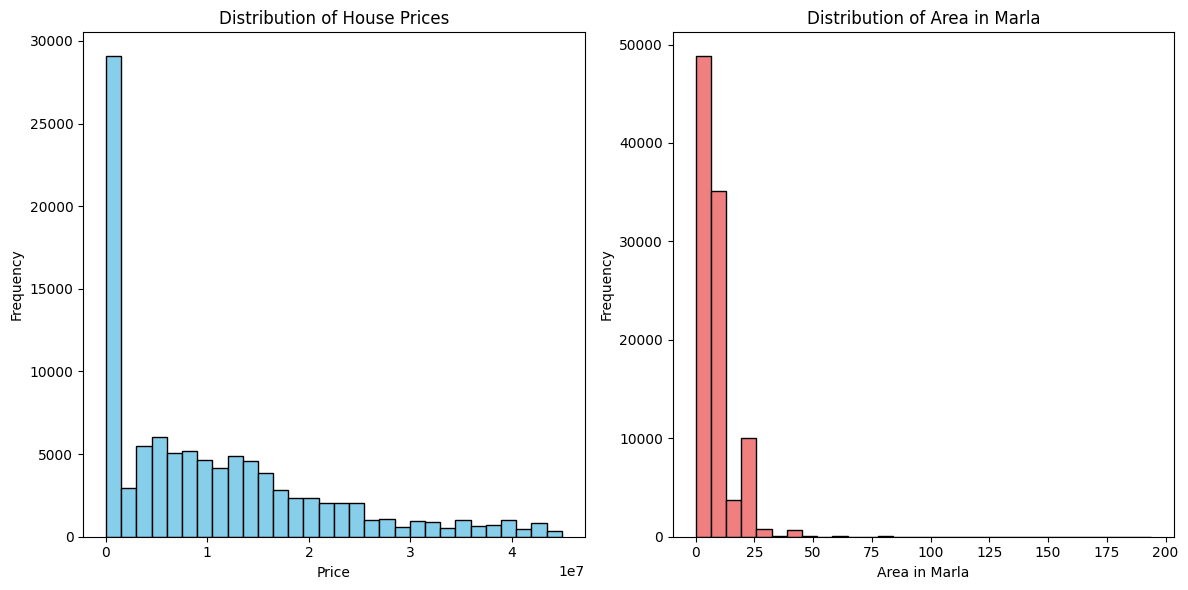

In [2]:
# Check data types
print(df.info())

# Unique values for categorical
for col in ['property_type', 'location', 'city', 'purpose']:
    print(f"\nUnique values for {col}:\n{df[col].value_counts()}")
    print(f"Number of unique values for {col}: {df[col].nunique()}")

# Visualize the distribution

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

plt.subplot(1, 2, 2)
plt.hist(df['Area_in_Marla'], bins=30, color='lightcoral', edgecolor='black')
plt.xlabel('Area in Marla')
plt.ylabel('Frequency')
plt.title('Distribution of Area in Marla')

plt.tight_layout()
plt.show()

## Data cleaning


In [3]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() * 100 / len(df)

# Identify and remove columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_drop, errors='ignore')

# Remove rows with more than 3 missing values
df = df.dropna(thresh=len(df.columns) - 3)

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Inspect the data again and print the number of rows and columns
print(f"Number of rows remaining: {df.shape[0]}")
print(f"Number of columns remaining: {df.shape[1]}")
display(df.head())

Number of rows remaining: 99499
Number of columns remaining: 9


,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,Date
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,2022-07-08
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,2021-10-10
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,2023-12-17
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,2024-05-04
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,2024-02-02


In [4]:
# Check for missing values
print("Missing values after all transformations:")
print(df.isnull().sum())

# Verify data types
print("\nData types after all transformations:")
print(df.dtypes)

# Recalculate descriptive statistics for numerical features
print("\nDescriptive statistics for numerical features after all transformations:")
print(df.describe(include=['int64', 'float64']))


Missing values after all transformations:
property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
Date             0
dtype: int64

Data types after all transformations:
property_type     object
price              int64
location          object
city              object
baths              int64
purpose           object
bedrooms           int64
Area_in_Marla    float64
Date              object
dtype: object

Descriptive statistics for numerical features after all transformations:
              price         baths      bedrooms  Area_in_Marla
count  9.949900e+04  99499.000000  99499.000000   99499.000000
mean   1.037592e+07      3.530106      3.350737       8.757479
std    1.066000e+07      1.474217      1.255913       7.466471
min    1.550000e+04      1.000000      0.000000       0.000000
25%    1.500000e+05      2.000000      2.000000       4.800000
50%    7.500000e+06      3.000000      3.000

In [5]:
df['total_rooms'] = df['bedrooms'] + df['baths']
print("\nCreated 'total_rooms' feature.")

# Display the first few rows with the new column
display(df.head())


Created 'total_rooms' feature.


,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,Date,total_rooms
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,2022-07-08,4
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,2021-10-10,6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,2023-12-17,11
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,2024-05-04,8
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,2024-02-02,6


# Data analysis


### YOY, MOM analysis 

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Year-over-Year % change
yoy = df.groupby('Year')['price'].mean().pct_change() * 100
print("Year-over-Year % Change:\n", yoy)

# Month-over-Month % change
mom = df.groupby([df['Date'].dt.to_period('M')])['price'].mean().pct_change() * 100
print("Month-over-Month % Change:\n", mom)


Year-over-Year % Change:
 Year
2021         NaN
2022   -1.591728
2023    1.805326
2024   -0.219000
Name: price, dtype: float64
Month-over-Month % Change:
 Date
2021-01         NaN
2021-02    0.667979
2021-03    1.472142
2021-04   -2.283018
2021-05    1.186349
2021-06    0.527812
2021-07    2.238337
2021-08   -3.176530
2021-09    1.417145
2021-10    1.317975
2021-11   -1.210327
2021-12   -1.325199
2022-01   -0.547936
2022-02    0.967349
2022-03    1.458971
2022-04   -8.459123
2022-05    5.302885
2022-06   -2.548294
2022-07    4.043320
2022-08    4.657475
2022-09   -7.553281
2022-10    3.538403
2022-11    1.581179
2022-12   -1.691395
2023-01    3.592887
2023-02   -3.296383
2023-03    3.553158
2023-04   -0.579599
2023-05   -1.621677
2023-06    1.292271
2023-07    1.969912
2023-08   -6.283103
2023-09    4.354994
2023-10   -5.701258
2023-11    4.707755
2023-12   -2.718710
2024-01   -1.166572
2024-02    2.936709
2024-03    1.855557
2024-04   -2.638609
2024-05    2.202915
2024-06   -2.001386


### gradient histogram on outliers

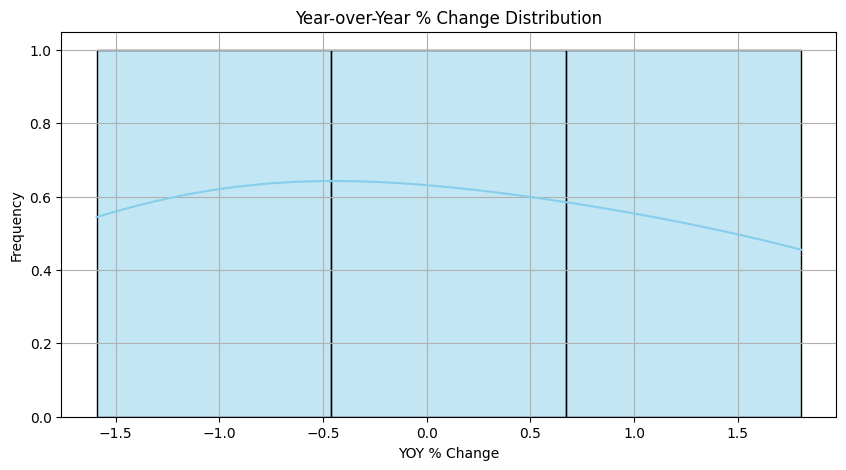

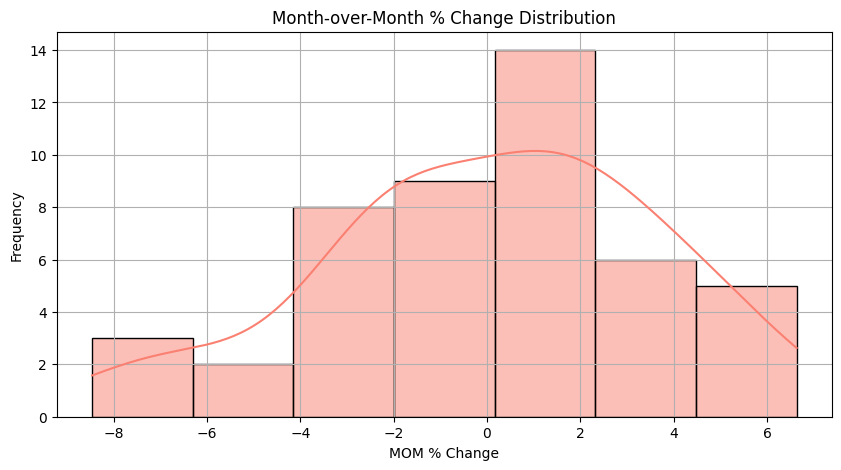

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# YOY Histogram
plt.figure(figsize=(10, 5))
sns.histplot(yoy.dropna(), kde=True, color='skyblue', edgecolor='black')
plt.title('Year-over-Year % Change Distribution')
plt.xlabel('YOY % Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# MOM Histogram
plt.figure(figsize=(10, 5))
sns.histplot(mom.dropna(), kde=True, color='salmon', edgecolor='black')
plt.title('Month-over-Month % Change Distribution')
plt.xlabel('MOM % Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### sub plots on commercial analysis & private analysis

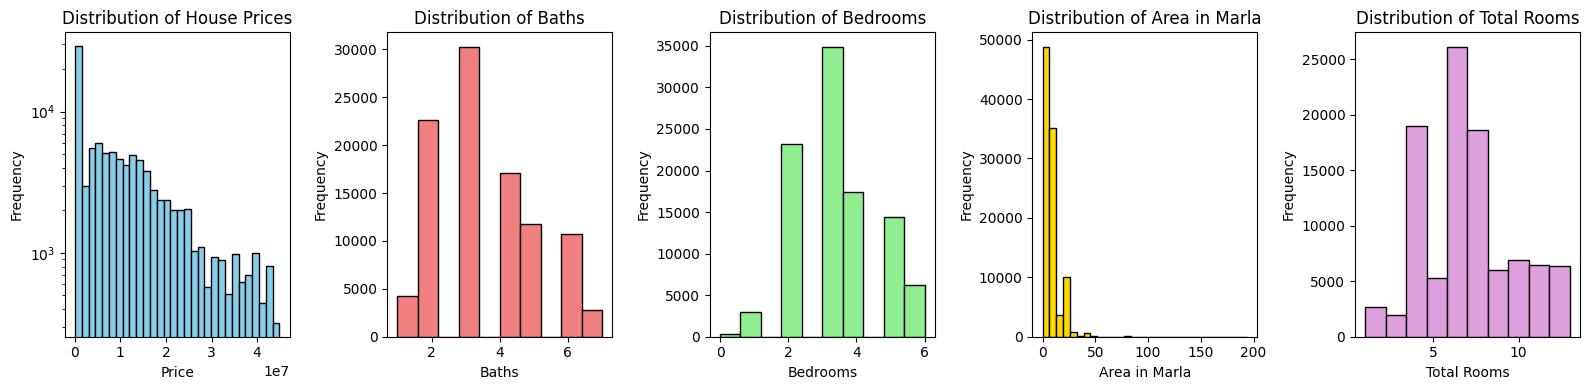

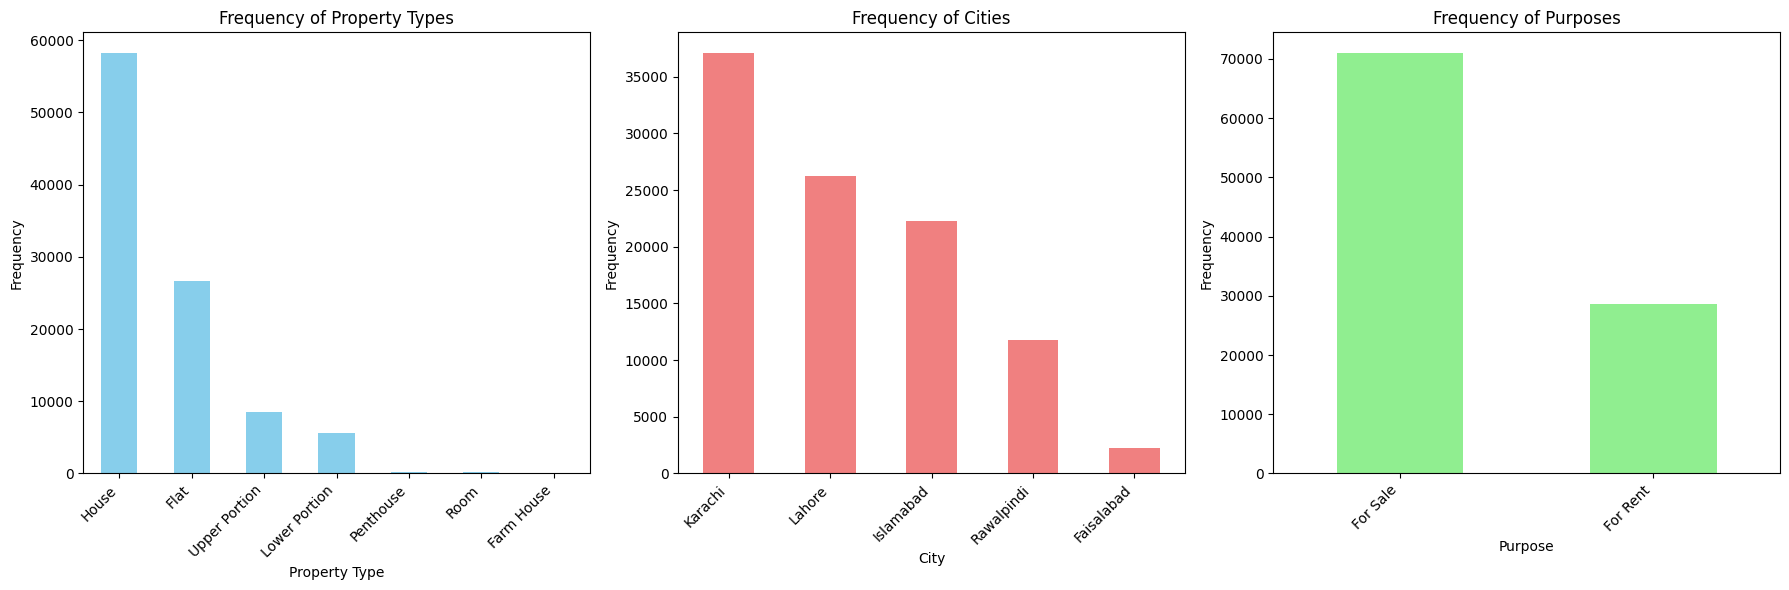

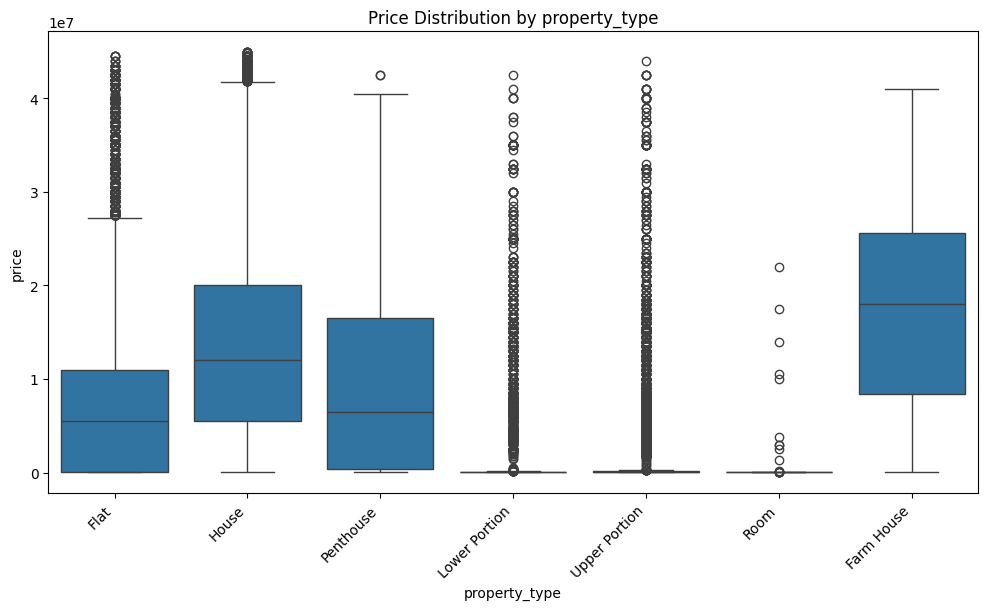

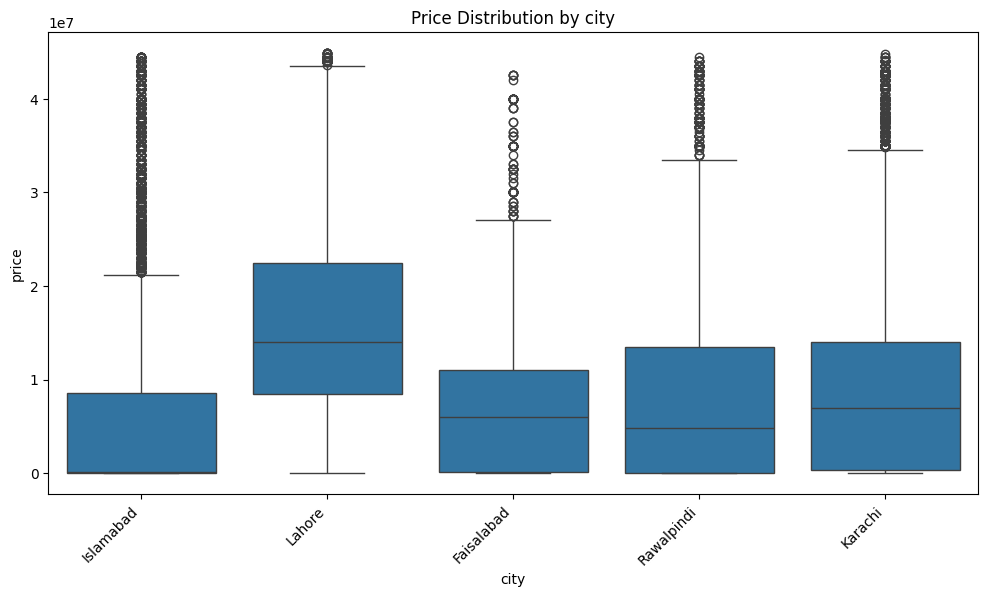

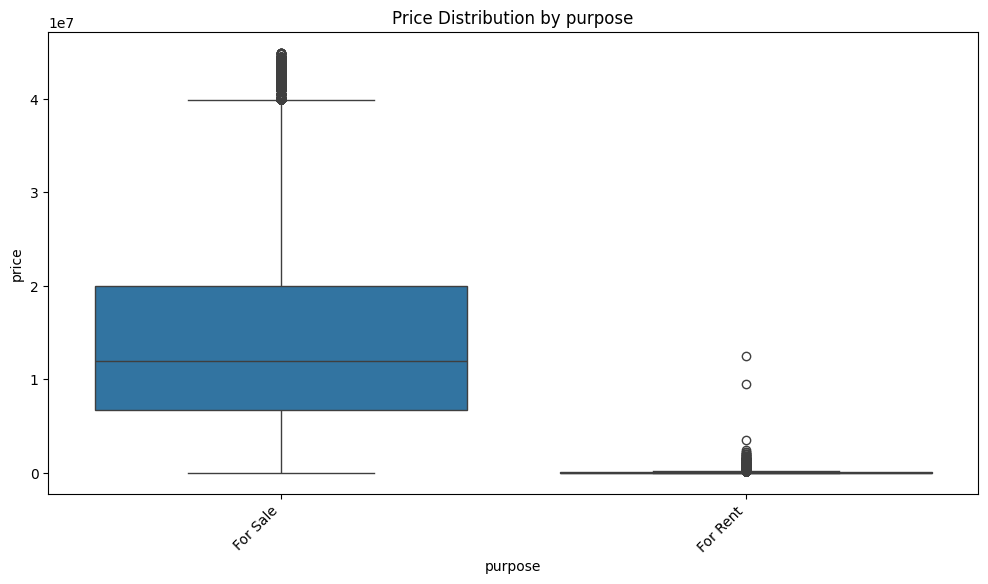

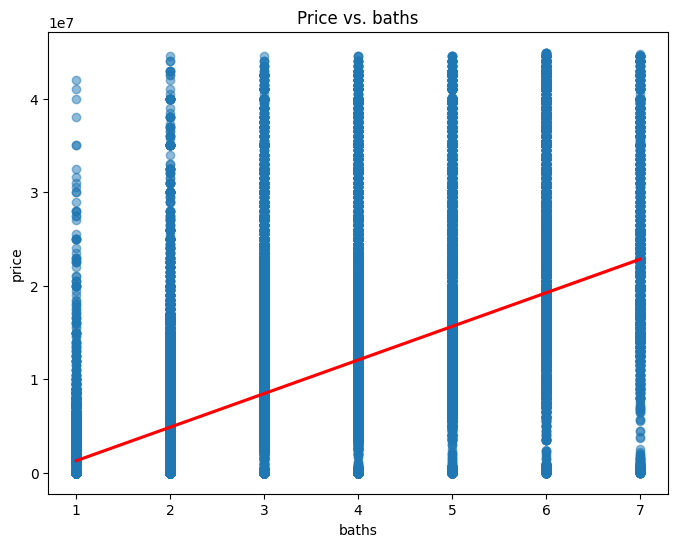

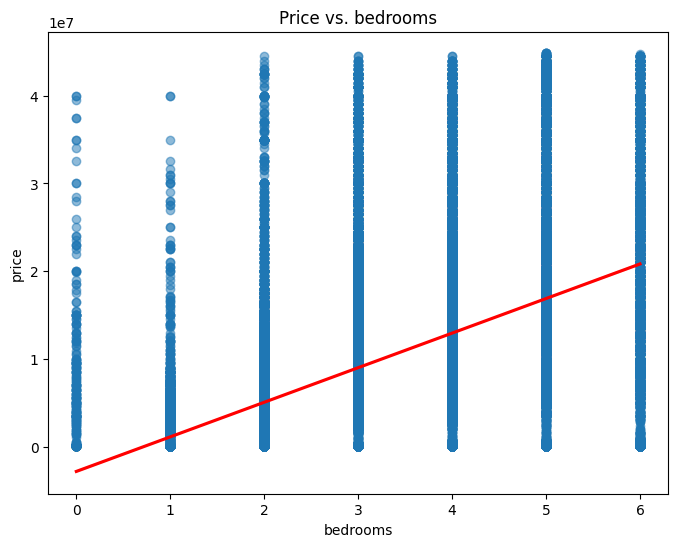

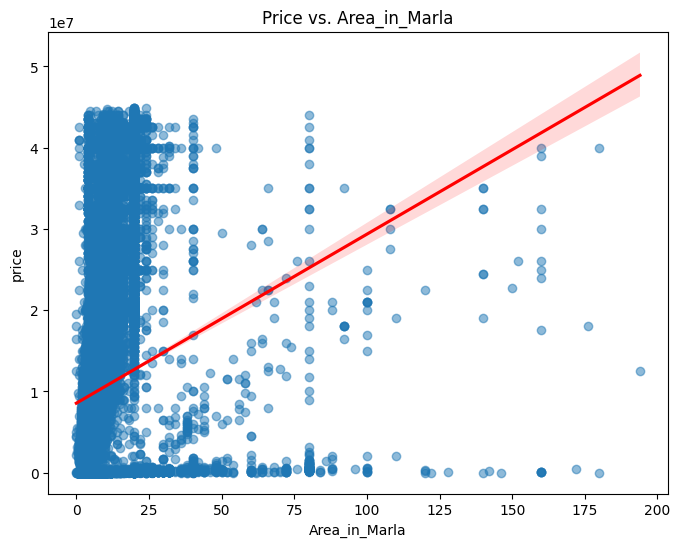

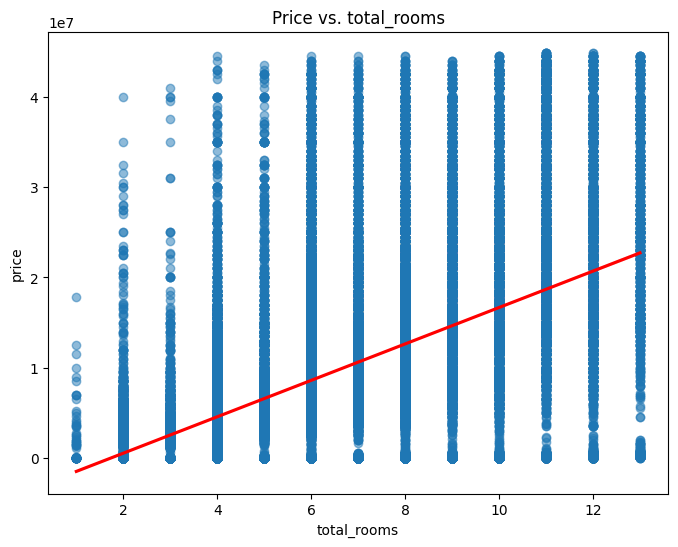

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for Numerical Features
plt.figure(figsize=(16, 4))
plt.subplot(1, 5, 1)
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.yscale('log') 

plt.subplot(1, 5, 2)
plt.hist(df['baths'], bins=10, color='lightcoral', edgecolor='black')
plt.xlabel('Baths')
plt.ylabel('Frequency')
plt.title('Distribution of Baths')

plt.subplot(1, 5, 3)
plt.hist(df['bedrooms'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')

plt.subplot(1, 5, 4)
plt.hist(df['Area_in_Marla'], bins=30, color='gold', edgecolor='black')
plt.xlabel('Area in Marla')
plt.ylabel('Frequency')
plt.title('Distribution of Area in Marla')

plt.subplot(1, 5, 5)
plt.hist(df['total_rooms'], bins=10, color='plum', edgecolor='black')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rooms')

plt.tight_layout()
plt.show()


# Bar Charts for Categorical Features
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
df['property_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')


plt.subplot(1, 3, 2)
df['city'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
df['purpose'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Purposes')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

# Box Plots for Numerical vs. Categorical Features
for col in ['property_type', 'city', 'purpose']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price Distribution by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# Scatter Plots for Numerical Feature Relationships
if 'total_rooms' not in df.columns:
    df['total_rooms'] = df['bedrooms'] + df['baths']

numerical_features = ['baths', 'bedrooms', 'Area_in_Marla', 'total_rooms']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=feature, y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Price vs. {feature}')
    plt.show()